# P2. Advance lane line detection

In this project, the goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car.

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


Import the different __libraries/modules__ used by the functions 

In [31]:
import numpy as np
import cv2
import pickle
import glob
import os
import sys
import matplotlib.pyplot as plt

%matplotlib qt

# Camera calibration

The objective of this step is to compute the camera calibration matrix `(mtx)` and  the distorsion coefficients `(dist)`. Four function have been defined fot that propouse:

1. `calibrate_camera(nx,ny,images)`: Calibrate a camera using the nx,ny parameters (chessboard pattern) and a directory with images of this pattern, where `nx` is the number of corners in a row, `ny` is the number of corners in a column and `image` is the list of the images used to calculate the calibration.
2. `undistort(img, mtx, dist)`: Undistort the image (img) using the calibrarion matrix (mtx) and the distorsion parameters (dist). Return the undirstoted image `dst`
3. `save_calibration(mtx,dist)` and `read_calibration()`: to save and read the calibration parameters.

### 1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

In [29]:
def calibrate_camera(nx,ny,images):
    """
    Calibrate a camera using the nx,ny parameters (chessboard pattern) and a directory with images of this pattern
    nx: number of corners in a row
    ny: number of corners in a column
    image: list of the images used to calculate the calibration
    """
    # Prepare object points [(0,0,0), (1,0,0), ....,(6,5,0)] using the nx and ny parameters (chessboard)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space (once there're defined, they are always the same points)
    imgpoints = [] # 2d points in image plane (for each image used to calibrate).

    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    if (len(objpoints) > 0):
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

def undistort(img, mtx, dist):
    """Undistort the image (img) using the calibrarion matrix (mtx) and the distorsion parameters (dist)"""
    udst = cv2.undistort(img, mtx, dist, None, mtx)
    return udst

def save_calibration(mtx,dist,fcalname):
    """Save (mtx) & (dist) into a file (calibration.p)"""
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open(fcalname, "wb"))

def read_calibration(fcalname):
    dist_pickle = pickle.load(open(fcalname, "rb"))
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    return mtx,dist
    
    

Perform the calibration and safe the calibration parameters on disk

In [38]:
#Chessboard parameters -> row(ny)&columns(nx)
nx=9
ny=6

img_dir = 'camera_cal/calibration*.jpg'
fcalname = "calibration.p"

# Load all the images in the directory
images = glob.glob(img_dir)
# Calibrate the camera and obtain the matrix (mtx) and the distorsion parameters (dist)
mtx, dist = calibrate_camera(nx,ny,images)
# Save the the matrix (mtx) and the distorsion parameters (dist) into a file
save_calibration(mtx,dist,fcalname)


An example of a distortion corrected calibration image.

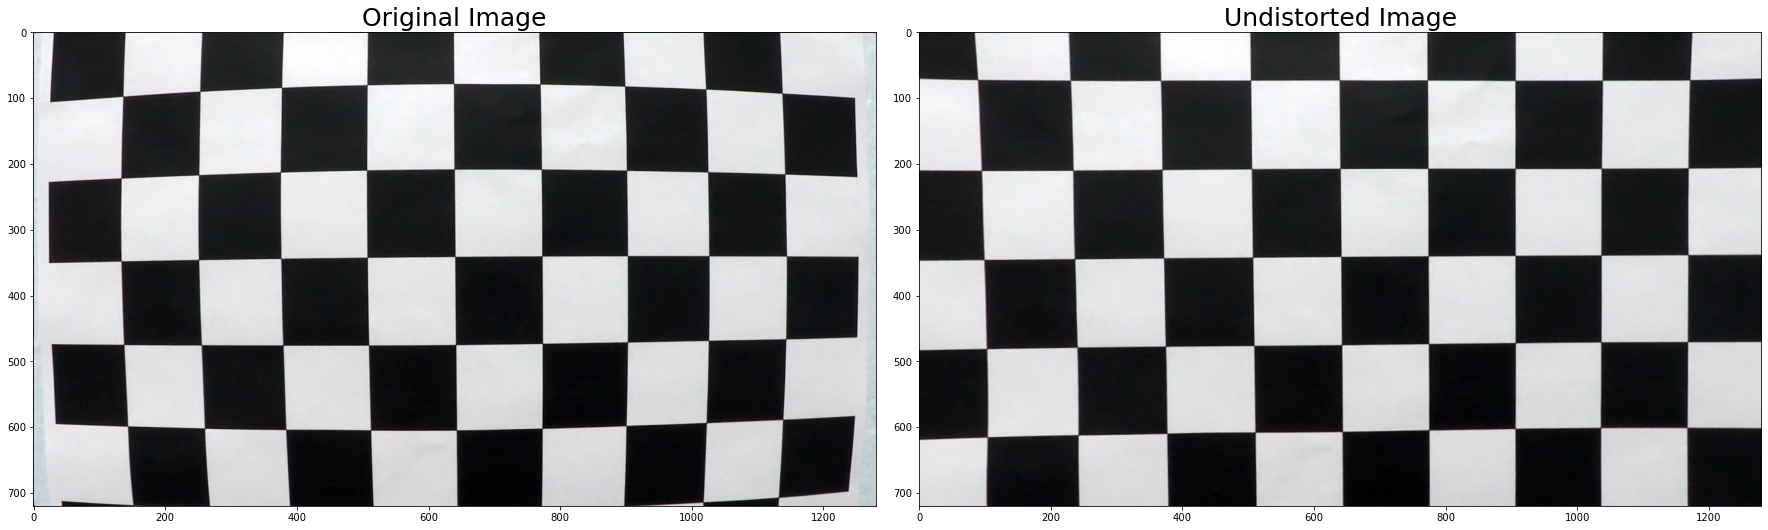

In [46]:
%matplotlib inline

fcalname = "calibration.p"

mtx, dist = read_calibration(fcalname)
#read one image used to calibrate the camera, a chessboard
img = cv2.imread('camera_cal/calibration1.jpg')
#undistort the image
udst = undistort(img,mtx,dist)
#save undistor example image (documentation)
cv2.imwrite('output_test_images/calibration1_undistort.jpg',udst))

#plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(udst)
ax2.set_title('Undistorted Image', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)